In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from numpy.linalg import pinv, norm, inv

In [2]:
q0 = np.array([1.20786251, 1.8685441])
x0 = fk(q0)
xp = np.array([-0.1, 1.0])

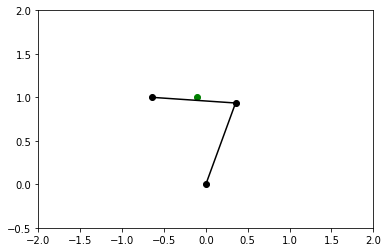

In [3]:
# plot initial configuration
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[0], xp[1], 'go')
x2, x1 = fk(q0, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()

In [4]:
qv = [q0]
qk = q0
xk = fk(q0)
Jk = J(q0)
nx = Jk.shape[0]
Ik = np.eye(nx)

# execute some newton itterations
for i in range(1, 20):
    Jk_inv = inv(Jk)
    q_new = qk + 0.1 * Jk_inv.dot(xp - xk)
    
    xk = fk(q_new)
    qk = q_new
    Jk = J(qk)

    qv.append(q_new)

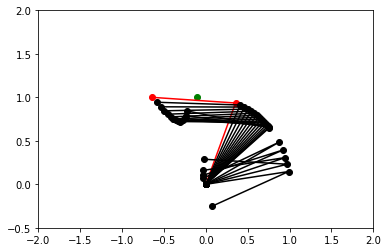

In [5]:
# plot initial configuration
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[0], xp[1], 'go')

# inital guess
x2, x1 = fk(q0, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ro-')

# newton itterations
for i in range(1, len(qv)):
    x2, x1 = fk(qv[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()

In [6]:
# test root finding approach
from scipy.optimize import root

In [7]:
sol = root(lambda q : xp - fk(q), q0)
print sol

    fjac: array([[-0.99527377, -0.09710878],
       [ 0.09710878, -0.99527377]])
     fun: array([ -6.64052147e-13,   3.41171535e-13])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([ -8.51119643e-10,   5.39523901e-10])
       r: array([-1.00874047, -0.50836103, -0.86066889])
  status: 1
 success: True
       x: array([ 0.6261494 ,  2.08863116])


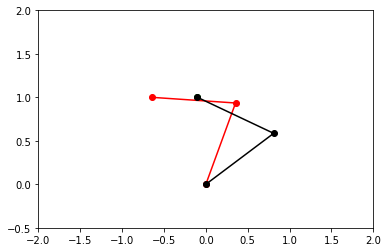

In [8]:
qsol = sol['x']
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[0], xp[1], 'go')

#plot initial configuration
x2, x1 = fk(q0, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ro-')

# plot solution
x2, x1 = fk(qsol, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()